In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


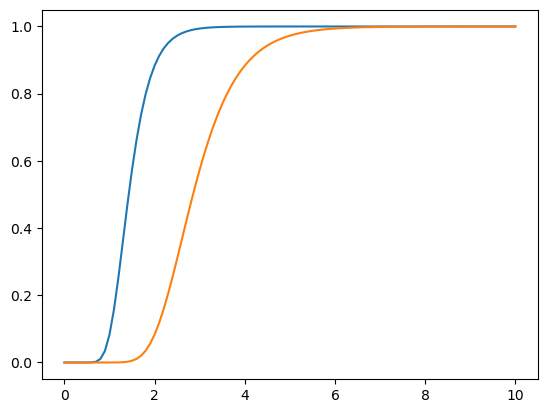

In [2]:
def gf( A, b, k, t):
    W = np.exp( np.log(A)-b*np.exp(-k*t))
    return W

A = 1
b=50
k=3
dt = .1
tmax = 10.
t = np.arange(0., tmax+dt, dt)

W1 = gf(A, b, k, t)
W2 = gf(A, b, k/2, t)
plt.plot(t,W1)
plt.plot(t,W2)

Text(0, 0.5, 'Growth Rate (dW/dt)')

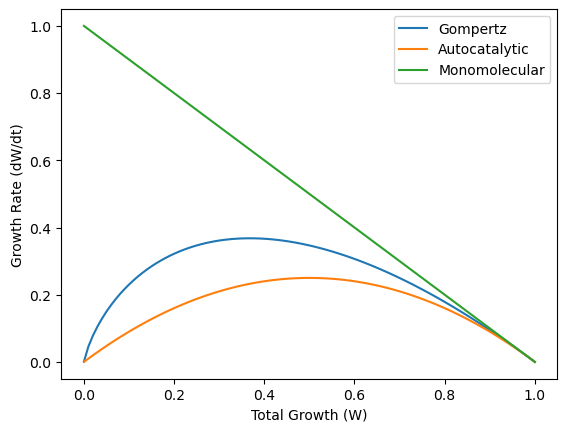

In [11]:
A=1
k=1
W = np.arange(0,1.01,.01)
W[0]=1e-4
gompertz = k*W*(np.log(A/W))
autocat = k*W*(A-W)/A
monomol = k*(A-W)

plt.plot(W,gompertz,label='Gompertz')
plt.plot(W,autocat,label='Autocatalytic')
plt.plot(W,monomol,label='Monomolecular')
plt.legend()
plt.xlabel('Total Growth (W)')
plt.ylabel('Growth Rate (dW/dt)')

In [13]:
W=0
W = np.max((W,1e-4))
print(W)

0.0001


2.766707196677487e-09
[35] [3.5] [0.99163654]


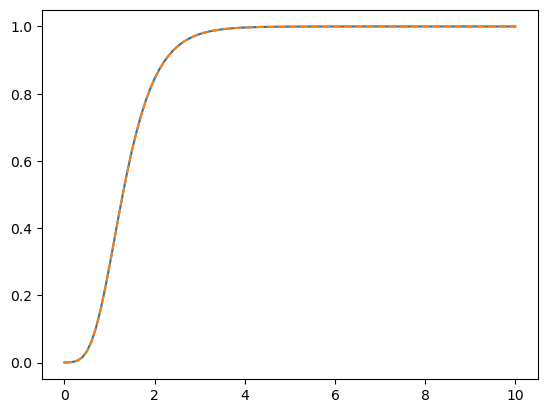

In [65]:
def gompertz(W,t,k=1,A=1):
    dWdt = k*W*(np.log(A/W))
    return dWdt

k=2
A=1
t=np.linspace(0, 10, 101)
W0 = 1e-4
W = np.squeeze( odeint(gompertz, W0, t, args=(k, A)) ) 

plt.plot(t,W,label='Numerical')
b=9.25
Wa = A*np.exp(-b*np.exp(-k*t))
plt.plot(t,Wa,'--',label='Analytical')
print(np.max( (Wa-W.T) ))
i99 = np.argwhere(W>=.99)[0]
print(i99,t[i99],W[i99])

[18.03531296 10.21604867 14.40377887 11.75613261 20.70517104 37.43143136
 24.92437765 14.57187556 30.39378929 11.14052609 32.40611055 32.86714853
  8.36101818 12.36342078 23.63310066 22.1277256   7.11363914 -1.16537722
 25.58458417 16.49111509]
[2.1035313  1.32160487 1.74037789 1.47561326 2.3705171  4.04314314
 2.79243777 1.75718756 3.33937893 1.41405261 3.54061105 3.58671485
 1.13610182 1.53634208 2.66331007 2.51277256 1.01136391 0.18346228
 2.85845842 1.94911151]


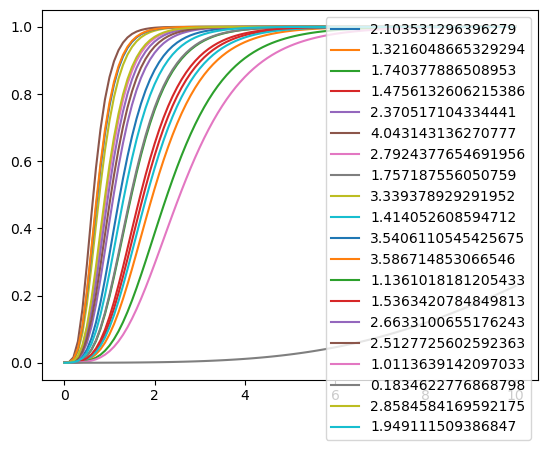

In [72]:
thick = np.random.normal(loc=20.0, scale=10.0, size=20)
print(thick)

kt = .3+thick/10.
print(kt)

for kti in kt:
    ts = '{}'.format(kti)
    plt.plot(t, A*np.exp(-b*np.exp(-kti*t)),label=ts)
             
plt.legend()
    

Text(0.5, 0, 'Overwash Thickness (cm)')

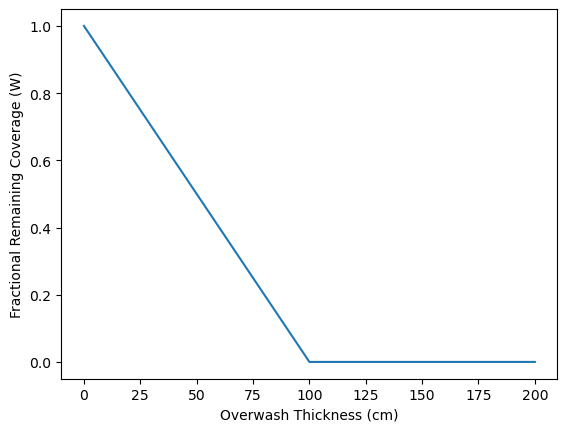

In [86]:
def W_thick(thick, Wmin=1.e-4):
    Wt = 1.-thick/100.
    Wt[Wt<=Wmin]=Wmin
    return Wt

thick = np.linspace(0,200,201)
Wt= W_thick(thick)
plt.plot(thick,Wt)
plt.ylabel('Fractional Remaining Coverage (W)')
plt.xlabel('Overwash Thickness (cm)')

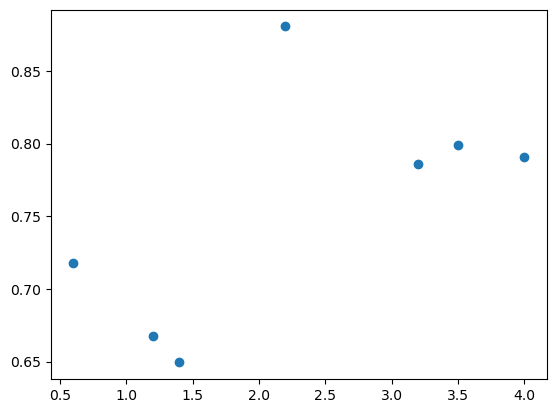

In [85]:
owt = [ .6, 1.2, 1.4, 2.2, 3.2, 3.5, 4.]
now = len(owt)
owthick = np.random.normal(loc=20.0, scale=10.0, size=now)
owthick[owthick<0]=0.
fig, axs = plt.subplots(1,2)


axs[1].plot(owt,1-owthick/100,'o')